In [22]:
# With this cell any imported module is reloaded before each cell execution
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import PointCloudLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_model_config,
    load_transform_config,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
loader = PointCloudLoader(
    {
        "num_classes": 3,
        "data_dir": "/Users/elphicm/PycharmProjects/challenge-icml-2024/modules/transforms/liftings/pointcloud2simplicial/",
    }
)
dataset = loader.load()

In [24]:
# Define transformation type and id
transform_type = "liftings"
# If the transform is a topological lifting, it should include both the type of the lifting and the identifier
transform_id = "pointcloud2simplicial/alpha_lifting"

# Read yaml file
transform_config = {
    "lifting": load_transform_config(transform_type, transform_id)
    # other transforms (e.g. data manipulations, feature liftings) can be added here
}


Transform configuration for pointcloud2simplicial/alpha_lifting:

{'transform_type': 'lifting',
 'transform_name': 'SimplicialAlphaLifting',
 'complex_dim': 2,
 'alpha': 0.8,
 'feature_lifting': 'ProjectionSum'}



Dataset only contains 1 sample:


Processing...
Done!


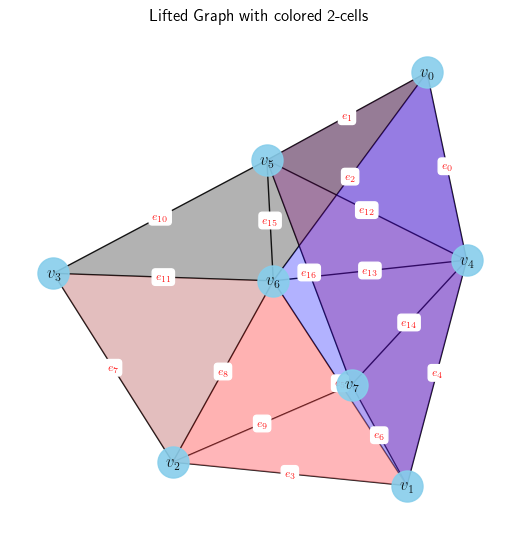

 - The complex has 8 0-cells.
 - The 0-cells have features dimension 1
 - The complex has 17 1-cells.
 - The 1-cells have features dimension 1
 - The complex has 10 2-cells.
 - The 2-cells have features dimension 1



In [25]:
lifted_dataset = PreProcessor(dataset, transform_config, loader.cfg["data_dir"])
describe_data(lifted_dataset)